In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

## Basic EDA

In [2]:
profanity = pd.read_csv('profainity.csv')
profanity.groupby('canonical_form_2').count().head()

,text,canonical_form_1,canonical_form_3,category_1,category_2,category_3,severity_rating,severity_description
canonical_form_2,,,,,,,,
arse,6,6,0,6,5,0,6,6
ass,46,46,2,46,38,2,46,46
bastard,2,2,0,2,1,0,2,2
bitch,5,5,0,5,3,0,5,5
butt,8,8,0,8,8,0,8,8


In [3]:
profanity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  1598 non-null   object 
 1   canonical_form_1      1598 non-null   object 
 2   canonical_form_2      210 non-null    object 
 3   canonical_form_3      6 non-null      object 
 4   category_1            1598 non-null   object 
 5   category_2            486 non-null    object 
 6   category_3            21 non-null     object 
 7   severity_rating       1598 non-null   float64
 8   severity_description  1598 non-null   object 
dtypes: float64(1), object(8)
memory usage: 112.5+ KB


In [4]:
profanity.describe()

,severity_rating
count,1598.000000
mean,2.028160
std,0.645068
min,1.000000
25%,1.400000
50%,2.000000
75%,2.600000
max,3.000000


In [5]:
profanity.isnull().sum()

text                       0
canonical_form_1           0
canonical_form_2        1388
canonical_form_3        1592
category_1                 0
category_2              1112
category_3              1577
severity_rating            0
severity_description       0
dtype: int64

In [6]:
word_counts = Counter(profanity['canonical_form_1'])
most_common_values = word_counts.most_common(10)

<BarContainer object of 10 artists>

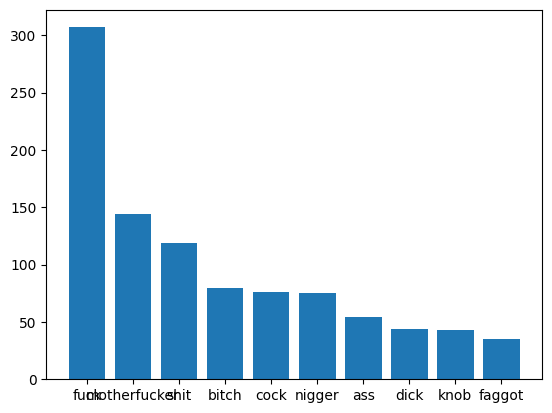

In [7]:
plt.bar(dict(most_common_values).keys(), dict(most_common_values).values())

<AxesSubplot:title={'center':'Frequency of the Length of Swear Words'}, xlabel='Swear Word Text Length', ylabel='Frequency'>

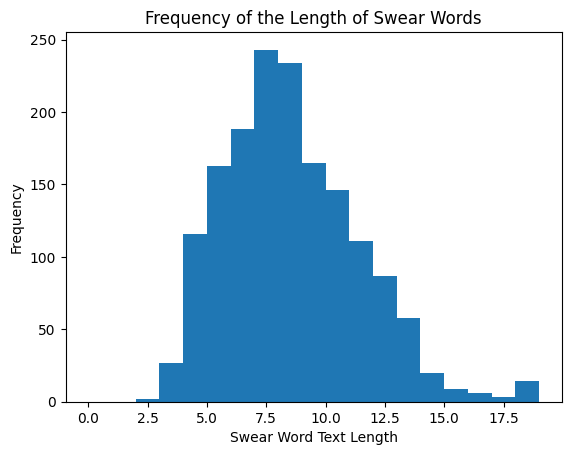

In [71]:
profanity['text_length'] = profanity['text'].apply(lambda x : len(x.replace(' ', '')))
profanity['text_length'].plot(kind = 'hist', title = 'Frequency of the Length of Swear Words', xlabel= 'Swear Word Text Length', bins = range(0,20,1))

In [9]:
def ends_with_hard_consonant(s):
    hard_consonants = {'b', 'c', 'd', 'g', 'k', 'p', 'q', 't'}
    s = s.rstrip()
    return len(s) > 0 and s[-1].lower() in hard_consonants

profanity['hard_or_not'] = profanity['text'].apply(ends_with_hard_consonant)
profanity.head()


,text,canonical_form_1,canonical_form_2,canonical_form_3,category_1,category_2,category_3,severity_rating,severity_description,text_length,hard_or_not
0,69,69,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild,2,False
1,@55,ass,NaN,NaN,sexual anatomy / sexual acts,NaN,NaN,1.0,Mild,3,False
2,@ssfcker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.8,Severe,8,False
3,@ssfucker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.8,Severe,9,False
4,@ssfvcker,fuck,ass,NaN,sexual anatomy / sexual acts,sexual orientation / gender,NaN,2.4,Strong,9,False


In [72]:
profanity['text_length'].mean()

8.1188986232791

<AxesSubplot:xlabel='category_1'>

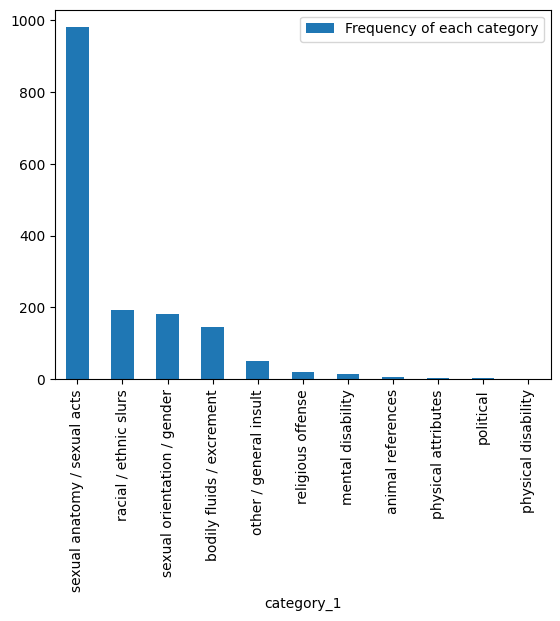

In [74]:
profanity[['category_1', 'text']].groupby('category_1').count().reset_index().sort_values('text', ascending= False).plot(kind = 'bar', x = 'category_1', y= 'text', label = 'Frequency of each category')

In [11]:
profanity['canonical_form_1']

0               69
1              ass
2             fuck
3             fuck
4             fuck
           ...    
1593          wank
1594           wop
1595           wop
1596    zipperhead
1597    zipperhead
Name: canonical_form_1, Length: 1598, dtype: object

In [12]:
pd.Series(profanity['canonical_form_1'].unique()).apply(ends_with_hard_consonant).mean()

0.3319672131147541

In [13]:
#finds the words that compound to other words and check their hard consenants
pd.Series(pd.concat([profanity['canonical_form_1'], profanity['canonical_form_2'], profanity['canonical_form_3']], ignore_index = True).dropna().unique()).apply(ends_with_hard_consonant).mean()

0.3373015873015873

In [14]:
def syllables(arr):
    count = 0
    for i in arr:
        if re.match(r'^[bcdfghjklmnpqrstvwxyz]*[aeiouy]+[bcdfghjklmnpqrstvwxz]*$', i):
            count +=1 
    return count

In [15]:
unique_compound = pd.Series(pd.concat([profanity['canonical_form_1'], profanity['canonical_form_2'], profanity['canonical_form_3']], ignore_index = True).dropna().unique())
unique_compound

0           69
1          ass
2         fuck
3          sex
4       orgasm
        ...   
247        hag
248      nigga
249        pig
250      trash
251    boiolas
Length: 252, dtype: object

In [16]:
monosyllables = unique_compound[unique_compound.apply(syllables) == 1]
monosyllables.apply(ends_with_hard_consonant).mean()

0.65625

<AxesSubplot:ylabel='severity_description'>

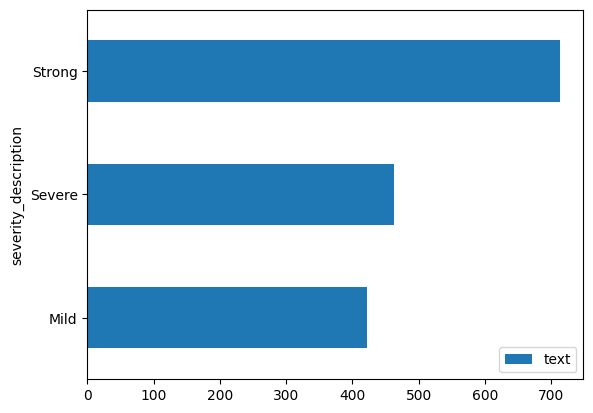

In [73]:
profanity[['severity_description', 'text']].groupby('severity_description').count().reset_index().plot(kind = 'barh', x= 'severity_description' , y = 'text')

<AxesSubplot:xlabel='category_1'>

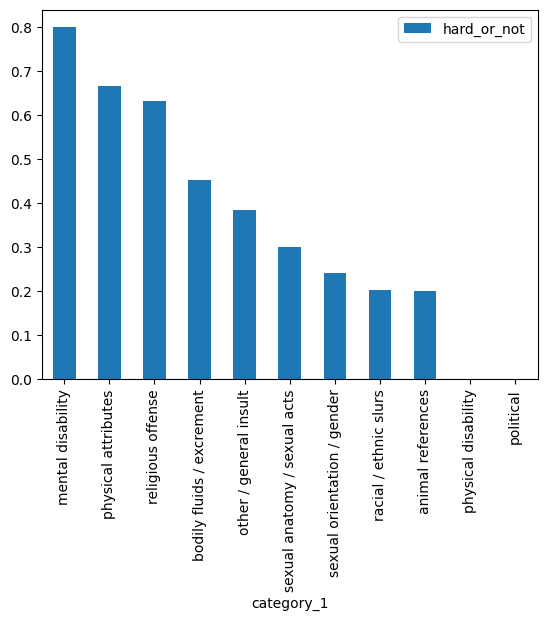

In [29]:
profanity.groupby('category_1')[['hard_or_not']].mean().sort_values('hard_or_not', ascending = False).plot(kind = 'bar')

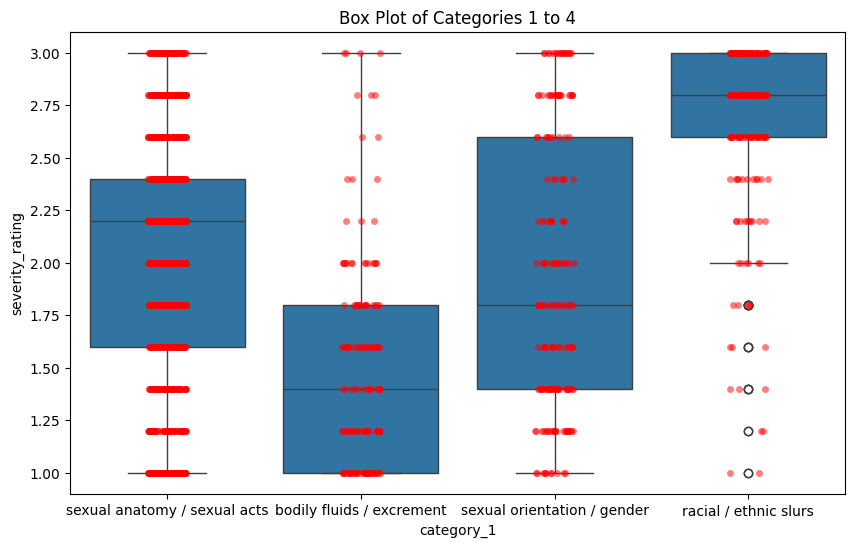

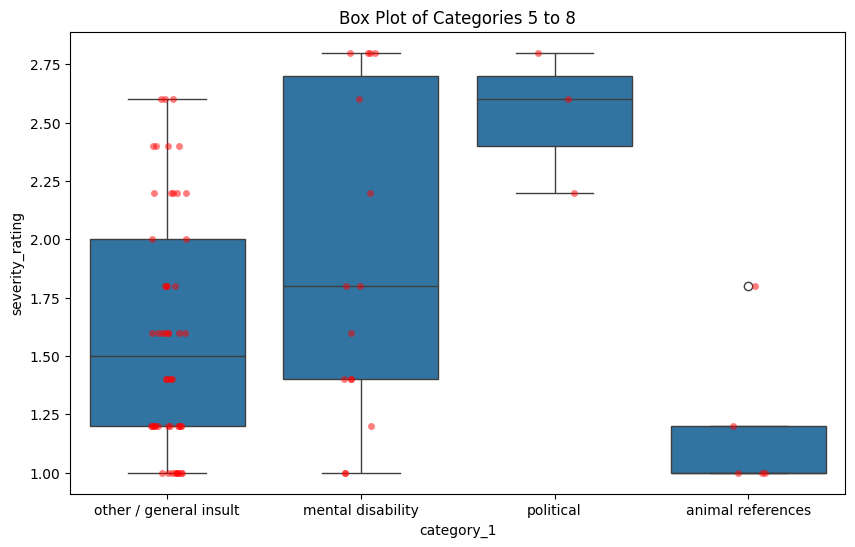

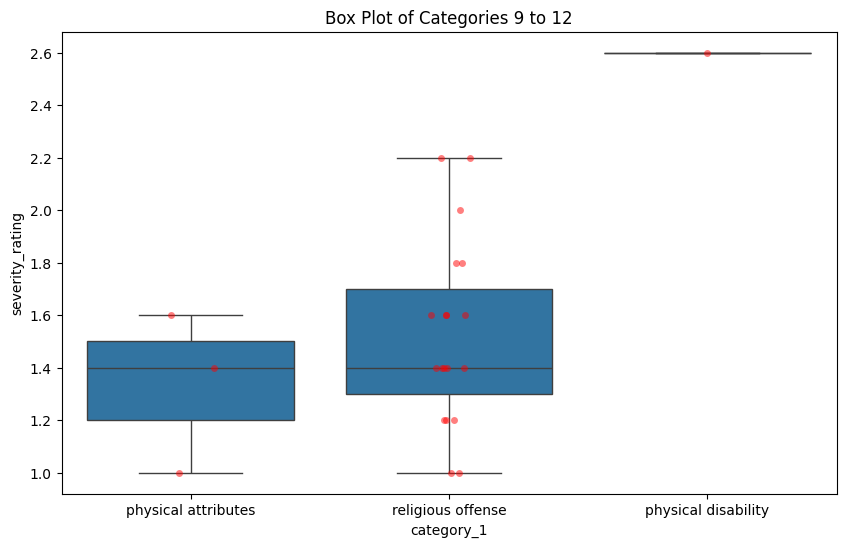

In [35]:
categories_per_plot = 4

unique_categories = profanity['category_1'].unique()

num_plots = len(unique_categories) // categories_per_plot + (1 if len(unique_categories) % categories_per_plot != 0 else 0)

for i in range(num_plots):
    plt.figure(figsize=(10, 6))
    subset_categories = unique_categories[i * categories_per_plot:(i + 1) * categories_per_plot]
    subset_data = profanity[profanity['category_1'].isin(subset_categories)]
    ax = sns.boxplot(x="category_1", y="severity_rating", data=subset_data)
    sns.stripplot(x="category_1", y="severity_rating", data=subset_data, color='red', alpha=0.5, jitter=True)
    ax.set_title(f'Box Plot of Categories {i * categories_per_plot + 1} to {(i + 1) * categories_per_plot}')
    plt.show()


<AxesSubplot:xlabel='category_1'>

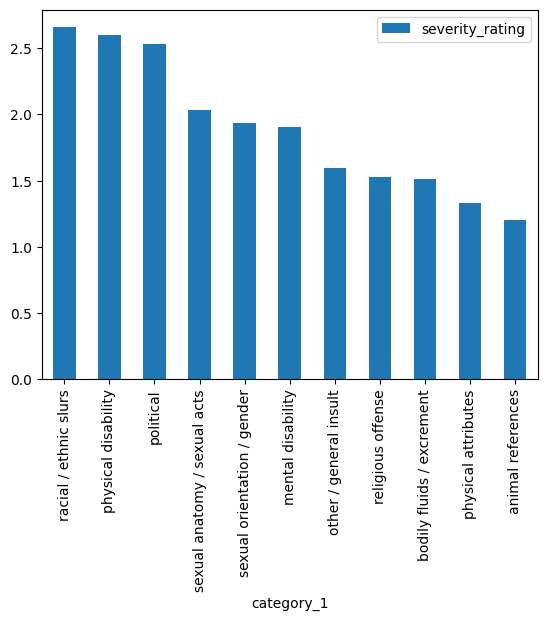

In [36]:
profanity.groupby('category_1')[['severity_rating']].mean().sort_values('severity_rating', ascending = False).plot(kind = 'bar')

### Classifier

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, label_binarize, LabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, RocCurveDisplay

In [152]:
X = profanity[['text', 'severity_rating', 'hard_or_not']]
y = profanity['category_1']
n_classes = len(set(y))
Y = label_binarize(y, classes=[*range(n_classes)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 2024)

In [153]:
def create_ngram_features(words, all_ngrams):
    ngram_features = []
    for word in words:
        ngrams = []
        ngrams.extend([word[idx:idx + n] for n in range(2, 4) for idx in range(len(word) - n + 1)])
        ngram_count = Counter(ngrams)
        feature_vector = [ngram_count.get(ngram, 0) for ngram in all_ngrams]
        ngram_features.append(feature_vector)
    return np.array(ngram_features)

In [154]:
all_ngrams = set()
for word in profanity['text'].to_numpy():
    bigrams = [word[idx:idx + 2] for idx in range(len(word) - 1)]
    trigrams = [word[idx:idx + 3] for idx in range(len(word) - 2)]
    all_ngrams.update(bigrams + trigrams)

In [155]:
X_train_features = np.append(create_ngram_features(X_train['text'], all_ngrams), X_train['severity_rating'].to_numpy().reshape(-1,1), 1)
X_test_features = np.append(create_ngram_features(X_test['text'], all_ngrams), X_test['severity_rating'].to_numpy().reshape(-1,1), 1)

In [156]:
X_train_features = np.append(X_train_features, X_train['hard_or_not'].to_numpy().reshape(-1,1), 1)
X_test_features = np.append(X_test_features, X_test['hard_or_not'].to_numpy().reshape(-1,1), 1)

## First Model

In [157]:
gnb = GaussianNB()
gnb.fit(X_train_features, y_train)
y_pred = gnb.predict(X_test_features)
(y_pred == y_test).mean()

0.76875

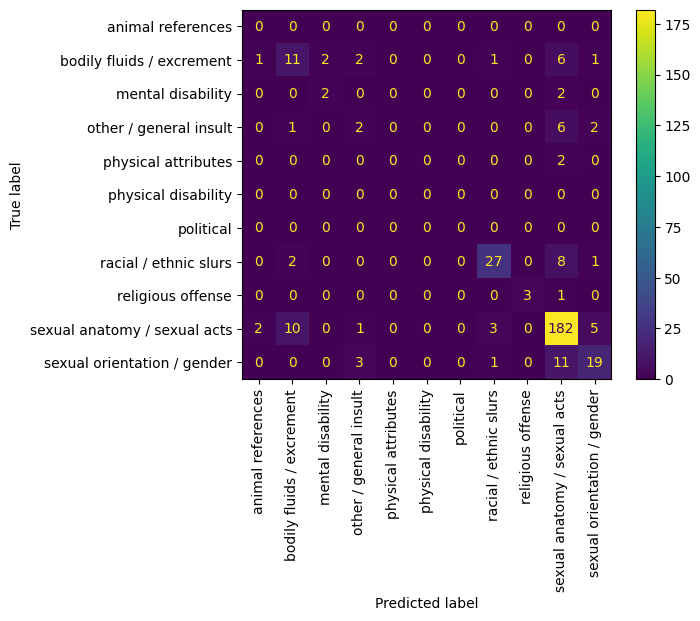

In [158]:
cm = confusion_matrix(y_test, y_pred, labels = gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= gnb.classes_)
disp.plot()
plt.xticks(rotation=90)

plt.show()

In [208]:
y_score = gnb.fit(X_train_features, y_train).predict_proba(X_test_features)
target_names = gnb.classes_

In [160]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape 

(320, 11)

In [161]:

fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.88


In [162]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  

mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
nan


/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [191]:
label_binarizer.transform(['sexual anatomy / sexual acts'])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [192]:
y_train.unique()

array(['other / general insult', 'sexual anatomy / sexual acts',
       'racial / ethnic slurs', 'bodily fluids / excrement',
       'sexual orientation / gender', 'religious offense',
       'animal references', 'mental disability', 'political',
       'physical attributes', 'physical disability'], dtype=object)

/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


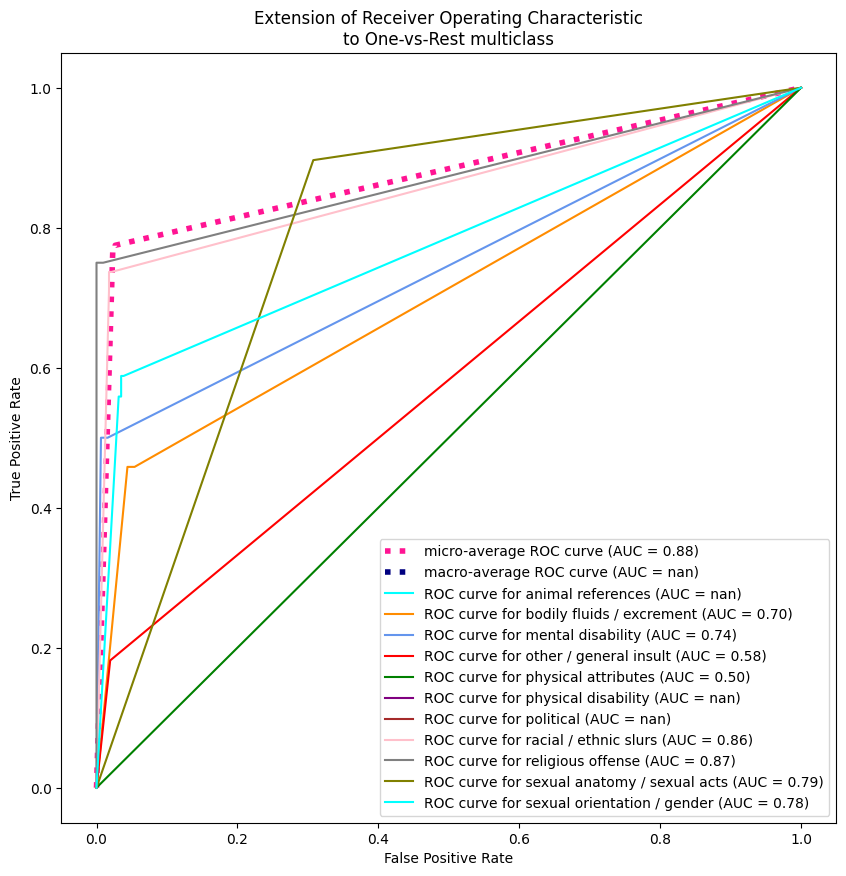

In [193]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle([
    "aqua", "darkorange", "cornflowerblue", "red", "green", "purple", "brown", 
    "pink", "gray", "olive", "cyan", "magenta", "yellow", "black", "navy", 
    "teal", "maroon", "lime", "indigo", "violet"
])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]


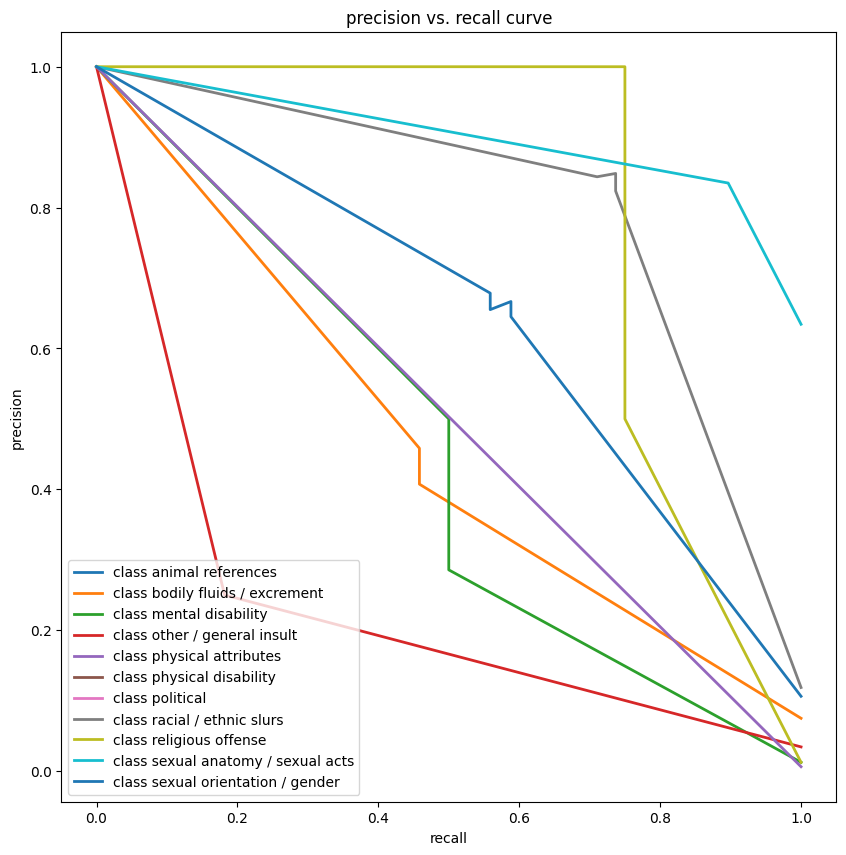

In [207]:
# precision recall curve
precision = dict()
recall = dict()
plt.figure(figsize=(10, 10))


for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'class {gnb.classes_[i]}'.format(i))
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

## Second Model

In [215]:
from sklearn.linear_model import LogisticRegression

clf = make_pipeline(StandardScaler(),
                    LogisticRegression())
clf.fit(X_train_features, y_train)


/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [216]:
log_pred = clf.predict(X_test_features)

In [217]:
clf.score(X_test_features, y_test)

0.8125

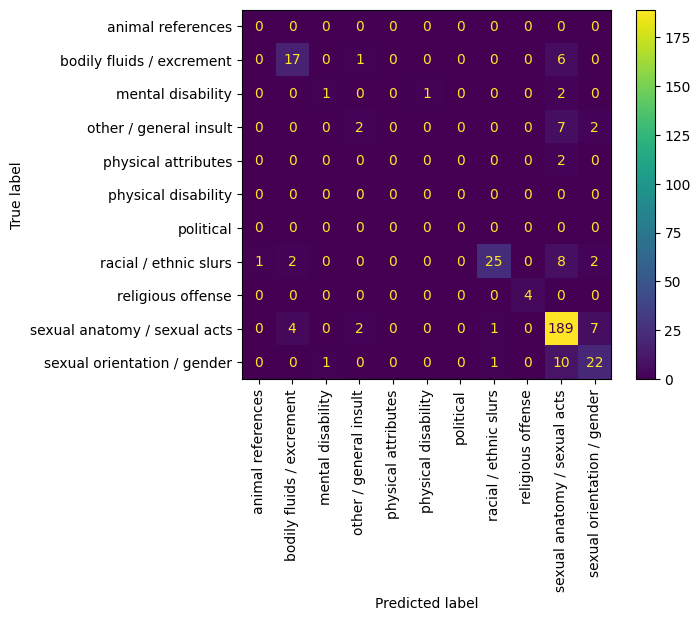

In [218]:
cm2 = confusion_matrix(y_test, log_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm2, display_labels= clf.classes_)
disp.plot()
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [219]:
y_score = clf.fit(X_train_features, y_train).predict_proba(X_test_features)
target_names = clf.classes_

/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [220]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape 

(320, 11)

In [221]:
fpr, tpr, roc_auc = dict(), dict(), dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.97


In [223]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  

mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
nan


/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


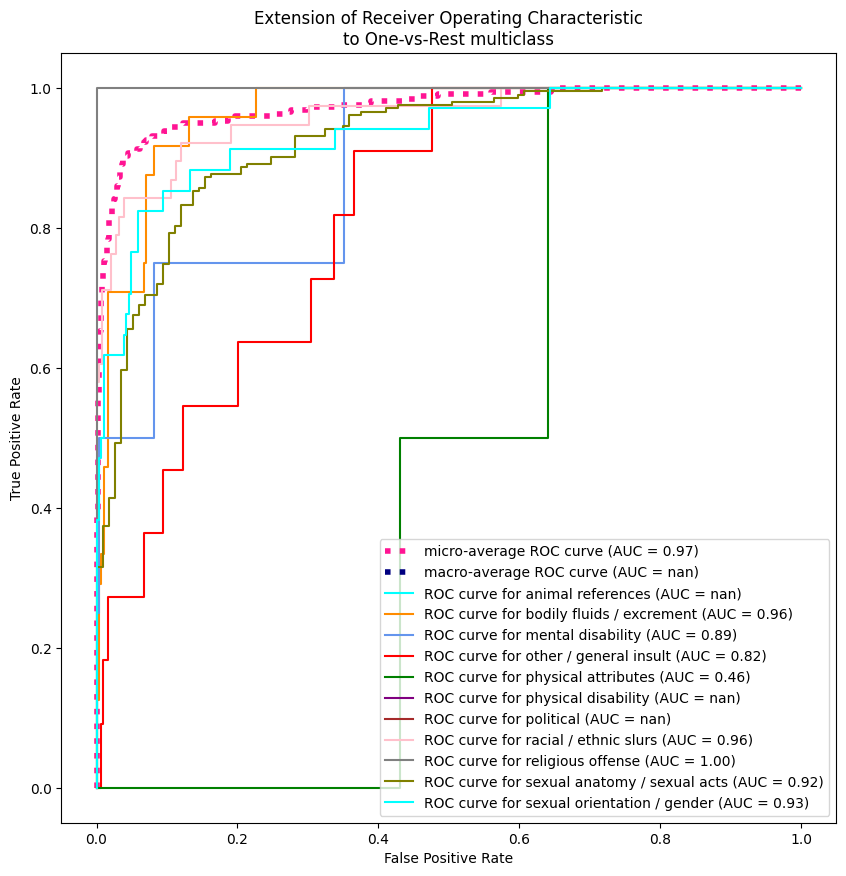

In [224]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle([
    "aqua", "darkorange", "cornflowerblue", "red", "green", "purple", "brown", 
    "pink", "gray", "olive", "cyan", "magenta", "yellow", "black", "navy", 
    "teal", "maroon", "lime", "indigo", "violet"
])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]
/Users/billwang/anaconda3/envs/DSC80/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in divide
  recall = tps / tps[-1]


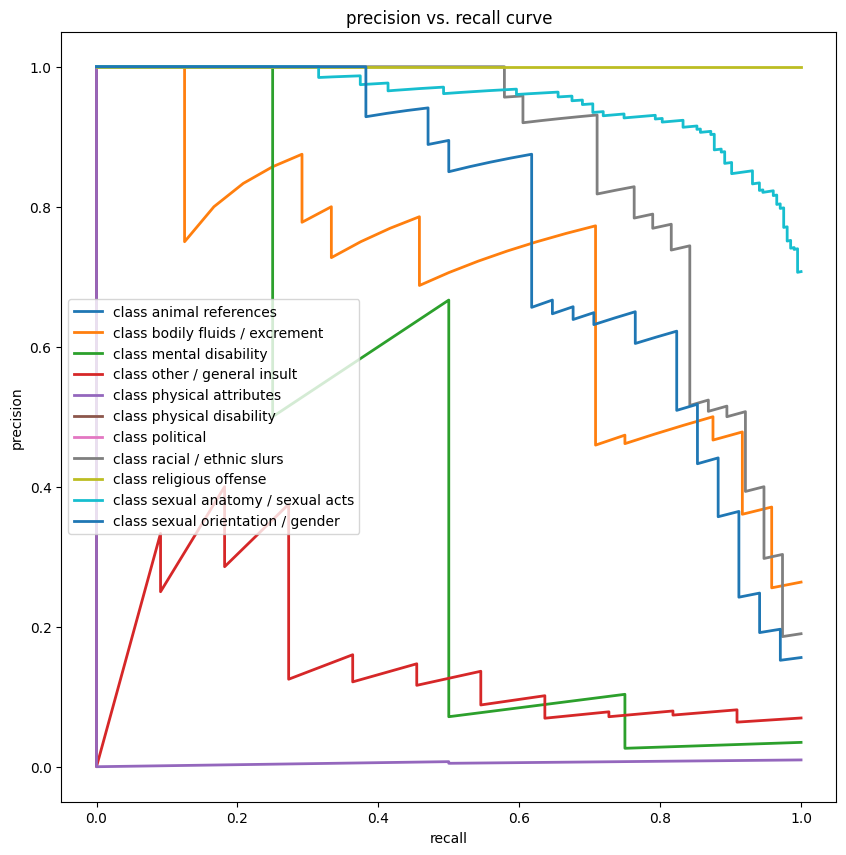

In [225]:
# precision recall curve
precision = dict()
recall = dict()
plt.figure(figsize=(10, 10))


for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'class {clf.classes_[i]}'.format(i))
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()